# What is PyTorch?

In [1]:
from __future__ import print_function
import torch
import numpy as np

### pytorch의 버전 확인

In [4]:
print(torch.__version__)

1.0.1


### uninitialized data -> default values in memory block

In [5]:
x = torch.empty(5,3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.7881e-42, 0.0000e+00],
        [0.0000e+00, 4.7428e+30, 0.0000e+00]])


### randomly initialized matrix

In [34]:
x = torch.rand(5,3)
print(x)

tensor([[0.6770, 0.1802, 0.3577],
        [0.5949, 0.6482, 0.6897],
        [0.3940, 0.7007, 0.4004],
        [0.3831, 0.4047, 0.1574],
        [0.9170, 0.9720, 0.3813]])


### ones는 1로 initialize, zeros는 0으로 initialize
### randn은 정규분포를 따르도록 randomly initialize

In [35]:
x = torch.ones(5,3)
y = torch.zeros(5,3)
z = torch.randn(5,3)
print(x)
print(y)
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[ 2.7557, -0.0324,  1.6163],
        [ 0.9112,  0.4200, -0.5960],
        [-0.4400,  0.4248, -0.1825],
        [-0.8313,  2.1323, -0.7495],
        [-0.4345,  1.7225, -0.9507]])


In [36]:
x = torch.tensor([[5,5],[3,4]])
print(x)

tensor([[5, 5],
        [3, 4]])


### Reuse properties of input tensor, e.g. dtype

In [44]:
x = x.new_ones(5,3, dtype=torch.double)
print(x)
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.8058,  0.0151,  0.1299],
        [ 1.7589,  0.7394,  0.8314],
        [ 1.9789, -0.4618, -0.9099],
        [ 1.2968, -0.3861, -0.6450],
        [-0.5266, -0.0292, -0.2772]])


In [45]:
print(x.size())

torch.Size([5, 3])


## Operations

In [46]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.0727,  0.9100,  0.9276],
        [ 2.3243,  0.7767,  1.5312],
        [ 2.5875,  0.0102, -0.1445],
        [ 1.6912,  0.0163, -0.0726],
        [-0.4662,  0.5031, -0.0275]])


In [47]:
print(torch.add(x,y))

tensor([[ 0.0727,  0.9100,  0.9276],
        [ 2.3243,  0.7767,  1.5312],
        [ 2.5875,  0.0102, -0.1445],
        [ 1.6912,  0.0163, -0.0726],
        [-0.4662,  0.5031, -0.0275]])


In [48]:
result = torch.empty(5,3)
torch.add(x,y, out=result)
print(result)

tensor([[ 0.0727,  0.9100,  0.9276],
        [ 2.3243,  0.7767,  1.5312],
        [ 2.5875,  0.0102, -0.1445],
        [ 1.6912,  0.0163, -0.0726],
        [-0.4662,  0.5031, -0.0275]])


### in-place

In [49]:
y.add_(x)
print(y)

tensor([[ 0.0727,  0.9100,  0.9276],
        [ 2.3243,  0.7767,  1.5312],
        [ 2.5875,  0.0102, -0.1445],
        [ 1.6912,  0.0163, -0.0726],
        [-0.4662,  0.5031, -0.0275]])


### indexing just like numpy

In [50]:
print(x[:,1])

tensor([ 0.0151,  0.7394, -0.4618, -0.3861, -0.0292])


### resize/reshape tensor

In [59]:
a = torch.randn(4,4)
b = a.view(16)
c = a.view(-1,8)
d = a.view(-1,4)
e = a.view(-1,2)
print(a.size())
print(b.size())
print(c.size())
print(d.size())
print(e.size())

torch.Size([4, 4])
torch.Size([16])
torch.Size([2, 8])
torch.Size([4, 4])
torch.Size([8, 2])


### get value as a Python number

In [62]:
print(a)
print(a[2,2])
print(a[2,2].item())

tensor([[-0.2465,  0.9589,  0.2569, -0.5673],
        [ 0.7361,  1.5043,  0.5045, -1.8115],
        [-0.3831,  0.2480,  1.6127, -0.1815],
        [ 1.6709,  0.9122,  0.5337, -2.5376]])
tensor(1.6127)
1.6127454042434692


### Converting torch tensor -> numpy array

In [63]:
print(a)
b = a.numpy()
print(b)

tensor([[-0.2465,  0.9589,  0.2569, -0.5673],
        [ 0.7361,  1.5043,  0.5045, -1.8115],
        [-0.3831,  0.2480,  1.6127, -0.1815],
        [ 1.6709,  0.9122,  0.5337, -2.5376]])
[[-0.24654935  0.95890445  0.25688747 -0.56725305]
 [ 0.7361437   1.5043486   0.50450987 -1.811518  ]
 [-0.38305104  0.2479934   1.6127454  -0.18149355]
 [ 1.6709428   0.9122366   0.53369105 -2.537633  ]]


### Converting numpy array -> torch tensor 

In [66]:
c = torch.from_numpy(b)
print(c)

tensor([[ 0.7535,  1.9589,  1.2569,  0.4327],
        [ 1.7361,  2.5043,  1.5045, -0.8115],
        [ 0.6169,  1.2480,  2.6127,  0.8185],
        [ 2.6709,  1.9122,  1.5337, -1.5376]])


In [67]:
torch.add(a,1, out=a)
print(a)
print(b)
print(c)

tensor([[ 1.7535,  2.9589,  2.2569,  1.4327],
        [ 2.7361,  3.5043,  2.5045,  0.1885],
        [ 1.6169,  2.2480,  3.6127,  1.8185],
        [ 3.6709,  2.9122,  2.5337, -0.5376]])
[[ 1.7534506   2.9589045   2.2568874   1.4327469 ]
 [ 2.7361436   3.5043488   2.50451     0.18848205]
 [ 1.616949    2.2479935   3.6127453   1.8185065 ]
 [ 3.6709428   2.9122367   2.533691   -0.53763294]]
tensor([[ 1.7535,  2.9589,  2.2569,  1.4327],
        [ 2.7361,  3.5043,  2.5045,  0.1885],
        [ 1.6169,  2.2480,  3.6127,  1.8185],
        [ 3.6709,  2.9122,  2.5337, -0.5376]])


### CUDA Tensors (GPU)

In [69]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x.to("cpu")
    print(x)
    print(y)
    print(z)

tensor([0.7904], device='cuda:0')
tensor([1.], device='cuda:0')
tensor([0.7904])


# Autograd

In [18]:
import torch

In [70]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [71]:
y = x+2
print("y = {}".format(y))

y = tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [72]:
print(y.grad_fn)

In [73]:
z = y*y*3
out = z.mean()
print("z = {}".format(z))
print("out =", out)

z = tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
out = tensor(27., grad_fn=<MeanBackward1>)


### $o = \frac{1}{4}\sum_i z_i$

In [74]:
a = torch.randn(2,2)
a = (a*3)/(a-1)
print(a.requires_grad)

False


In [75]:
a.requires_grad_(True)   # in-place
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

True


### calculate gradient

In [76]:
out.backward()

### $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$

### gradients d(out)/dx

In [77]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [88]:
x = torch.randn(3, requires_grad=True)
y = x*2
while y.data.norm()<1000:
    y = y*2
print(y)

tensor([  20.0673, 1328.8898, -297.8754], grad_fn=<MulBackward0>)


In [89]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


### stop autograd by wrapping in 'with torch.no_grad()'

In [90]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)
    
print((x*x*3).requires_grad)

with torch.no_grad():
    print((x*x*3).requires_grad)

True
True
False
True
False


# Neural Networks

In [91]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [92]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, stride=1)   # (input_dim, output_dim, filter_size)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)   # (input_dim, output_dim)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))   # max poopling with 2x2 filter
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features=1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [103]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [104]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1593,  0.0087, -0.0206, -0.0492,  0.0147,  0.0979,  0.0065,  0.0890,
          0.0458,  0.0793]], grad_fn=<AddmmBackward>)


In [105]:
net.zero_grad()
out.backward(torch.randn(1,10))

### Loss Function

In [110]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2501, grad_fn=<MseLossBackward>)


### Backpropagation

In [111]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0158,  0.0093, -0.0032, -0.0019, -0.0038,  0.0311])


In [112]:
import torch.optim as optim

In [113]:
optimizer = optim.SGD(net.parameters(), lr=0.01)   # SGD, Nesterov-SGD, Adam, RMSProp, etc.

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Training a Classifier

In [114]:
import torch
import torchvision
import torchvision.transforms as transforms

In [115]:
print(torchvision.__version__)

0.2.2


### Downloading data (training data and test data)

In [116]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [117]:
import matplotlib.pyplot as plt
import numpy as np

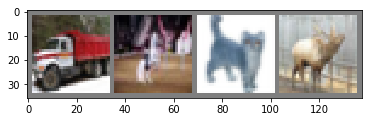

truck horse   cat  deer


In [118]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define Neural Network

In [119]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### check if gpu is available

In [120]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
if device!='cpu':
    net.to(device)

cuda:0


### define loss function and optimizer

In [121]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [122]:
print(device)

cuda:0


### train the Neural Network

In [123]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        if device!='cpu':
            inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1)%2000 == 0:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print("Finished Training!")

[1,  2000] loss: 2.151
[1,  4000] loss: 1.825
[1,  6000] loss: 1.677
[1,  8000] loss: 1.578
[1, 10000] loss: 1.509
[1, 12000] loss: 1.452
[2,  2000] loss: 1.374
[2,  4000] loss: 1.360
[2,  6000] loss: 1.330
[2,  8000] loss: 1.313
[2, 10000] loss: 1.287
[2, 12000] loss: 1.282
Finished Training!


### test the Neural Network on test data

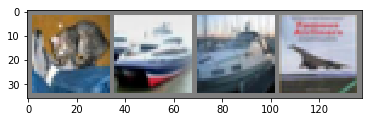

GroundTruth:    cat  ship  ship plane


In [124]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [125]:
if device!="cpu":
    images = images.to(device)
outputs = net(images)

In [126]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [127]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        if device!="cpu":
            images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
print("Accuracy of the network on the 10000 test images: %d %%" % (100*correct/total))

Accuracy of the network on the 10000 test images: 58 %


In [128]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print("Accuracy of %5s: %2d %%" % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane: 56 %
Accuracy of   car: 69 %
Accuracy of  bird: 36 %
Accuracy of   cat: 42 %
Accuracy of  deer: 49 %
Accuracy of   dog: 45 %
Accuracy of  frog: 67 %
Accuracy of horse: 69 %
Accuracy of  ship: 76 %
Accuracy of truck: 67 %
